<h1>Creating a climate model for Weather Data</h1>

<h3>Importing all the required libraries</h3>

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import MinMaxScaler

<h3>Importing the data set and using linear interpolation to reduce null values</h3>
<h3>Reading the first few lines of the data</h3>

In [38]:
df = pd.read_csv('climate-daily.csv', low_memory=False )
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

df.head()

,x,y,STATION_NAME,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,PROVINCE_CODE,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,...,SPEED_MAX_GUST,SPEED_MAX_GUST_FLAG,COOLING_DEGREE_DAYS,COOLING_DEGREE_DAYS_FLAG,HEATING_DEGREE_DAYS,HEATING_DEGREE_DAYS_FLAG,MIN_REL_HUMIDITY,MIN_REL_HUMIDITY_FLAG,MAX_REL_HUMIDITY,MAX_REL_HUMIDITY_FLAG
0,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.20,2012-03-20 00:00:00,ON,2012,3,20,...,0.0,NaN,0.00,NaN,0.10,NaN,NaN,NaN,NaN,NaN
1,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.21,2012-03-21 00:00:00,ON,2012,3,21,...,50.0,NaN,0.90,NaN,0.00,NaN,NaN,NaN,NaN,NaN
2,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.22,2012-03-22 00:00:00,ON,2012,3,22,...,0.0,NaN,1.10,NaN,0.00,NaN,NaN,NaN,NaN,NaN
3,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.23,2012-03-23 00:00:00,ON,2012,3,23,...,61.0,NaN,0.55,M,4.25,M,NaN,NaN,NaN,NaN
4,-81.151111,43.033056,LONDON A,6144473,6144473.2012.3.24,2012-03-24 00:00:00,ON,2012,3,24,...,35.0,NaN,0.00,NaN,8.50,NaN,NaN,NaN,NaN,NaN


<h3>Describing the data set </h3>

In [39]:
df.describe()

,x,y,CLIMATE_IDENTIFIER,LOCAL_YEAR,LOCAL_MONTH,LOCAL_DAY,MEAN_TEMPERATURE,MIN_TEMPERATURE,MAX_TEMPERATURE,TOTAL_PRECIPITATION,TOTAL_RAIN,TOTAL_SNOW,SNOW_ON_GROUND,SNOW_ON_GROUND_FLAG,DIRECTION_MAX_GUST,SPEED_MAX_GUST,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS,MIN_REL_HUMIDITY,MAX_REL_HUMIDITY
count,3.011000e+03,3.011000e+03,3011.0,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,0.0,0.0,0.0,0.0,0.0,3011.000000,3011.000000,3011.000000,3011.000000,611.000000,611.000000
mean,-8.115111e+01,4.303306e+01,6144473.0,2015.878446,6.466290,15.762537,8.182398,3.092544,13.243872,NaN,NaN,NaN,NaN,NaN,0.727001,1.539356,0.761392,10.578994,59.324059,92.936170
std,2.117769e-12,4.974625e-14,0.0,2.412971,3.407795,8.810995,10.675195,10.005230,11.658458,NaN,NaN,NaN,NaN,NaN,4.229056,8.294979,1.727998,9.739640,14.869974,6.725656
min,-8.115111e+01,4.303306e+01,6144473.0,2012.000000,1.000000,1.000000,-24.500000,-30.500000,-19.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,20.000000,67.000000
25%,-8.115111e+01,4.303306e+01,6144473.0,2014.000000,4.000000,8.000000,0.100000,-3.500000,3.500000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.400000,49.000000,89.000000
50%,-8.115111e+01,4.303306e+01,6144473.0,2016.000000,6.000000,16.000000,8.400000,3.000000,14.200000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.600000,59.000000,95.000000
75%,-8.115111e+01,4.303306e+01,6144473.0,2018.000000,9.000000,23.000000,17.600000,11.300000,23.800000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,17.900000,69.000000,98.000000
max,-8.115111e+01,4.303306e+01,6144473.0,2020.000000,12.000000,31.000000,28.500000,23.200000,34.800000,NaN,NaN,NaN,NaN,NaN,36.000000,96.000000,10.500000,42.500000,95.000000,100.000000


In [50]:
init = df['LOCAL_DATE'][0]
final = df['LOCAL_DATE'][df.shape[0]-1]



Tempsinitial = datetime.strptime(init, '%Y-%m-%d %H:%M:%S')
Tempsfinal = datetime.strptime(final, '%Y-%m-%d %H:%M:%S')

interval = Tempsfinal-Tempsinitial


print('Data collected')
print ('Start time: ', init)
print ('End time:   ', final)
print ('interval:   ', interval)


Data collected
Start time:  2012-03-20 00:00:00
End time:    2020-07-01 00:00:00
interval:    3025 days, 0:00:00


Text(0.5, 0, 'Days')

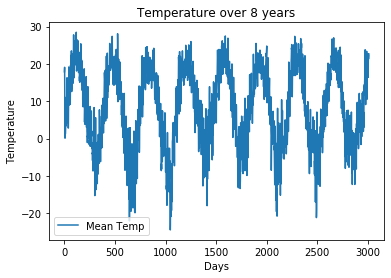

In [51]:
plt.plot(df['MEAN_TEMPERATURE'], label='Mean Temp')
plt.legend()
plt.title('Temperature over 8 years')
plt.ylabel('Temperature')
plt.xlabel('Days')

<h3>Finding the features that have null values </h3>

In [15]:
df.isnull().sum()

x                              0
y                              0
STATION_NAME                   0
CLIMATE_IDENTIFIER             0
ID                             0
LOCAL_DATE                     0
PROVINCE_CODE                  0
LOCAL_YEAR                     0
LOCAL_MONTH                    0
LOCAL_DAY                      0
MEAN_TEMPERATURE               0
MEAN_TEMPERATURE_FLAG       2987
MIN_TEMPERATURE                0
MIN_TEMPERATURE_FLAG        2987
MAX_TEMPERATURE                0
MAX_TEMPERATURE_FLAG        2987
TOTAL_PRECIPITATION         3011
TOTAL_PRECIPITATION_FLAG       0
TOTAL_RAIN                  3011
TOTAL_RAIN_FLAG                0
TOTAL_SNOW                  3011
TOTAL_SNOW_FLAG                0
SNOW_ON_GROUND              3011
SNOW_ON_GROUND_FLAG         3011
DIRECTION_MAX_GUST             0
DIRECTION_MAX_GUST_FLAG     2393
SPEED_MAX_GUST                 0
SPEED_MAX_GUST_FLAG         2393
COOLING_DEGREE_DAYS            0
COOLING_DEGREE_DAYS_FLAG    2987
HEATING_DE

<h3>Creating a heat map to determine correlation between temperature and other features in the data set</h3>

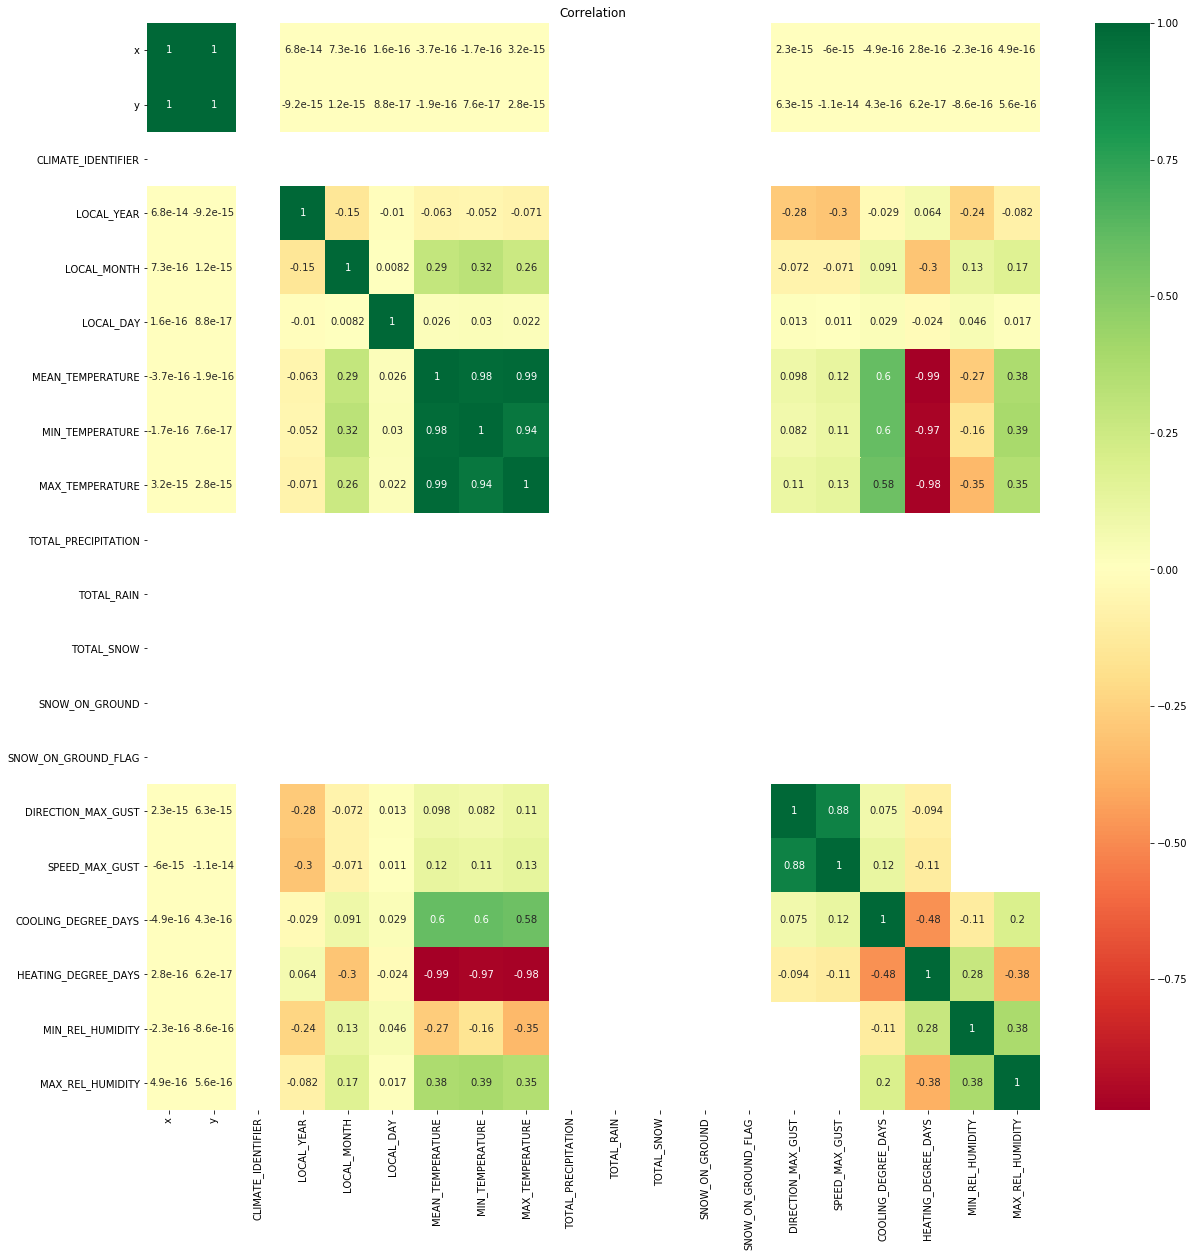

In [28]:
#getting correlations of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
plt.title('Correlation')

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [29]:
X1 = df['DIRECTION_MAX_GUST']
X2 = df['SPEED_MAX_GUST']
X3 = df['COOLING_DEGREE_DAYS']


X = pd.concat([X1, X2, X3], axis=1) #features 
y = df['MEAN_TEMPERATURE'] #target column

<h3>Scaling the features</h3>

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
print(X)

[[0.         0.         0.        ]
 [0.05555556 0.52083333 0.08571429]
 [0.         0.         0.1047619 ]
 ...
 [0.         0.         0.38095238]
 [0.         0.         0.4       ]
 [0.         0.         0.44761905]]


<h3>Splitting the data into a testing and a training set</h3>

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [32]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, Y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [33]:
y_predBaseline = dummy_regr.predict(X_test)

In [34]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_predBaseline})
print(df.head(10))
plot = df[:10]

      Actual  Predicted
2065     2.2   8.439881
553     11.9   8.439881
2594     7.5   8.439881
2487    -9.2   8.439881
1872    13.0   8.439881
489     14.8   8.439881
1840     8.3   8.439881
2779    -6.6   8.439881
1841    14.2   8.439881
118     24.3   8.439881


In [35]:
rmsd = np.sqrt(mean_squared_error(Y_test, y_predBaseline))      
r2_value = r2_score(Y_test, y_predBaseline)                     

print("Root Mean Square Error \n", rmsd) #the lower the value the better the fit
print("R^2 Value: \n", r2_value) #the closer to 1 the better the fit

Root Mean Square Error 
 11.056965790915305
R^2 Value: 
 -0.013706436004298439


<h3>Plotting the actual outputs vs. the predicted outputs</h3>

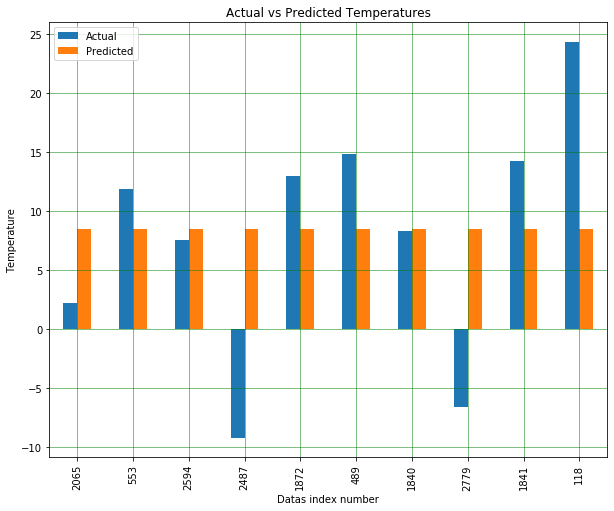

In [24]:
plot.plot(kind='bar',figsize=(10,8))

plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs Predicted Temperatures')
plt.ylabel('Temperature')
plt.xlabel('Datas index number')

plt.show()